In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

class EM:
    def __init__(self, file_name): #'./docword.nips.txt'
        f = open(file_name, 'r')
        lines = f.readlines()
        f.close()

        self.doc_count = int(lines[0]) # N
        self.word_num = int(lines[1])
        self.total_word_count = int(lines[2])
        self.topic_num = 30

        output = [[0 for j in range(self.word_num)] for i in range(self.doc_count)]

        i = 3
        while i < len(lines):
            line = lines[i].split(' ')
            doc_id = int(line[0])
            word_id = int(line[1])
            word_count = int(line[2])
            output[doc_id-1][word_id-1] = word_count
            i += 1

        #print(output[0])

        self.data = np.array(output, dtype=np.float128)

        self.pi_s = np.random.rand(self.topic_num) #np.array([1/30 for i in range(self.topic_num)], dtype=np.float128)
        self.pi_s = self.pi_s /  np.sum(self.pi_s)
        # self.pi_s = np.zeros(30)
        # self.pi_s[0] = 1
        self.l = None
        self.p_s = np.array([np.random.rand(self.word_num) for j in range(30)], dtype=np.float128)
        for i in range(30):
            sum_ = np.sum(self.p_s[i])
            for j in range(self.word_num):
                self.p_s[i][j] /= sum_
        self.R = self.data.dot(np.log10(self.p_s).T)
        self.log_pi = np.log10(self.pi_s)

    def e_step(self):
        # i = range(self.doc_count)
        # j = range(30)
        w = np.array([[0 for j in range(self.topic_num)] for i in range(self.doc_count)], dtype=np.float128)

        R = self.data.dot(np.log10(self.p_s).T)
        self.R = R
        log_pi = np.log10(self.pi_s)
        self.log_pi = log_pi

        for i in range(R.shape[0]):
            sum_ = 0.0
            max_ = 0.0
            for j in range(R.shape[1]):
                w[i][j] = R[i, j] + log_pi[j]
                #print R[i,j] + log_pi[j]

                if (w[i][j] < max_):
                    max_ = w[i][j]
            for j in range(R.shape[1]):
                w[i][j] -= max_
                sum_ += w[i][j]
            for j in range(R.shape[1]):
                w[i][j] /= (sum_)

        #print(np.sum(w, axis = 1))
        #print(np.sum(w.T, axis = 1))

        self.w = w
        print('done e_step')

    def m_step(self):
        for j in range(self.topic_num):
            numer = 0
            denom = 0

            #self.pi_s[j] = 0
            for i in range(self.doc_count):
                numer += (self.data[i] * self.w[i][j])
                denom += (np.sum(self.data[i]) * self.w[i][j])

                # self.pi_s[j] += self.w[i, j]

            self.p_s[j] = numer / denom

            # self.pi_s[j] = self.pi_s[j] / self.doc_count
            self.pi_s[j] = (np.sum(self.w[:, j])) / self.doc_count

        print('done m_step')
        #print(np.sum(self.pi_s))
        #print(np.sum(self.p_s[0]))

    def em_step(self):
        while True:
            self.e_step()
            self.m_step()

            # smooth

            self.p_s += 0.02
            for i in range(self.p_s.shape[0]):
                self.p_s[i] = self.p_s[i] / np.sum(self.p_s[i])

            l = self.likelihood()
            if self.l is not None:
                print 'relative difference in likelihood'
                relative = abs((l - self.l) / self.l)
                print relative
                if relative < 1e-6:
                    break
            self.l = l


    def likelihood(self):
        l = 0
        for i in range(self.doc_count):
            inner_sum = 0
            for j in range(30):
                inner_sum += (self.R[i][j] + self.log_pi[j]) * self.w[i][j]
            l += inner_sum
        return l

In [2]:
em = EM('docword.nips.txt')
em.em_step()

done e_step
done m_step
done e_step
done m_step
relative difference in likelihood
0.0344194443034
done e_step
done m_step
relative difference in likelihood
3.09494817078e-05
done e_step
done m_step
relative difference in likelihood
1.77510006062e-05
done e_step
done m_step
relative difference in likelihood
1.30254561479e-05
done e_step
done m_step
relative difference in likelihood
9.60264254894e-06
done e_step
done m_step
relative difference in likelihood
2.04215357607e-06
done e_step
done m_step
relative difference in likelihood
3.54913844528e-06
done e_step
done m_step
relative difference in likelihood
5.598907192e-06
done e_step
done m_step
relative difference in likelihood
5.183248263e-06
done e_step
done m_step
relative difference in likelihood
4.19582777117e-06
done e_step
done m_step
relative difference in likelihood
3.37496533826e-06
done e_step
done m_step
relative difference in likelihood
2.68702938439e-06
done e_step
done m_step
relative difference in likelihood
2.1230401798


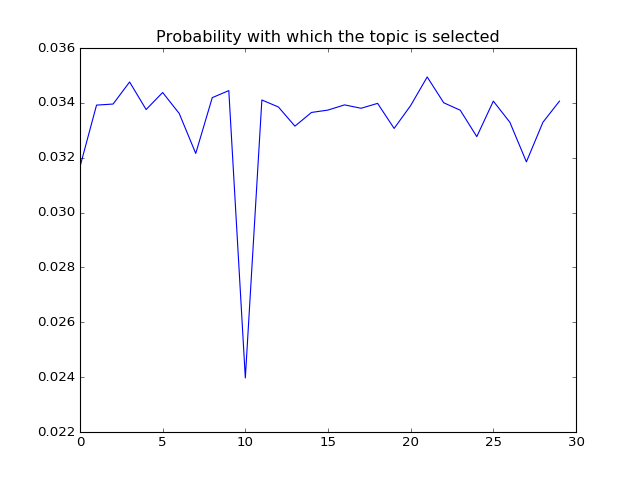

In [3]:
plt.plot(em.pi_s)
plt.title('Probability with which the topic is selected')
plt.show()

In [9]:
vocabs = np.loadtxt('vocab.nips.txt',dtype=str)
for i in range(30):
    sorted_index = np.argsort(em.p_s[i])
    print "topic " + str(i)
    words = ""
    ps = ""
    for index in sorted_index[-10:]:
        print vocabs[index] + " : " + str(em.p_s[i][index]) + ", ",
    print "\n"

topic 0
training : 0.000105144224138,  neural : 0.000106815755522,  input : 0.000106973167553,  data : 0.000107079590143,  set : 0.000108755676084,  algorithm : 0.000109068985172,  function : 0.000114000539993,  model : 0.000116652686886,  learning : 0.000119072199564,  network : 0.000138750024626,  

topic 1
data : 0.000102898657045,  system : 0.000103314148438,  algorithm : 0.000103338154483,  set : 0.000104300832813,  neural : 0.000106630081024,  input : 0.00010945221708,  function : 0.000110648397171,  learning : 0.000113507883645,  model : 0.000118963877623,  network : 0.000134335603927,  

topic 2
data : 0.000103006067322,  system : 0.000103280608671,  algorithm : 0.000103624812043,  set : 0.000104570409801,  neural : 0.00010694473035,  input : 0.000109749443754,  function : 0.000110962672251,  learning : 0.000113858598235,  model : 0.000118184005256,  network : 0.000135264718408,  

topic 3
data : 0.000101255927615,  algorithm : 0.000101375212717,  set : 0.000102891045198,  syst